In [33]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

**<p style="color:red">EXERCISE 1</p>**

**Create several bar charts to plot the icescream sales from the Sales dataset.**
* In the first bar chart, the x axis should represent the temperature values from lowest to highest. The color of the bars should be orange. The bar chart should have x label ("Temperature") and y label ("Sales").
* In the second plot, you should have 2 subplots: the first one is a bar chart of the sales data and the second one is a line chart of the same data. The plot whould have the title "Bar and Line Plot of Sales".

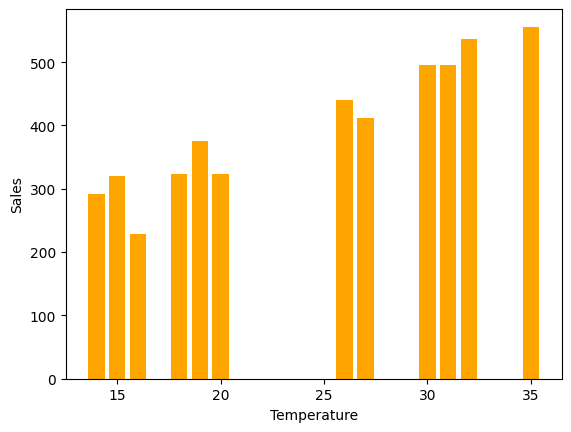

In [34]:
df_sales = pd.read_csv('Sales.csv')

df_sales_sorted = df_sales.sort_values('Temperature')
# print(df_sales_sorted)
temps = df_sales_sorted['Temperature']
sales = df_sales_sorted['Sales']


plt.bar(temps, sales, color='orange')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

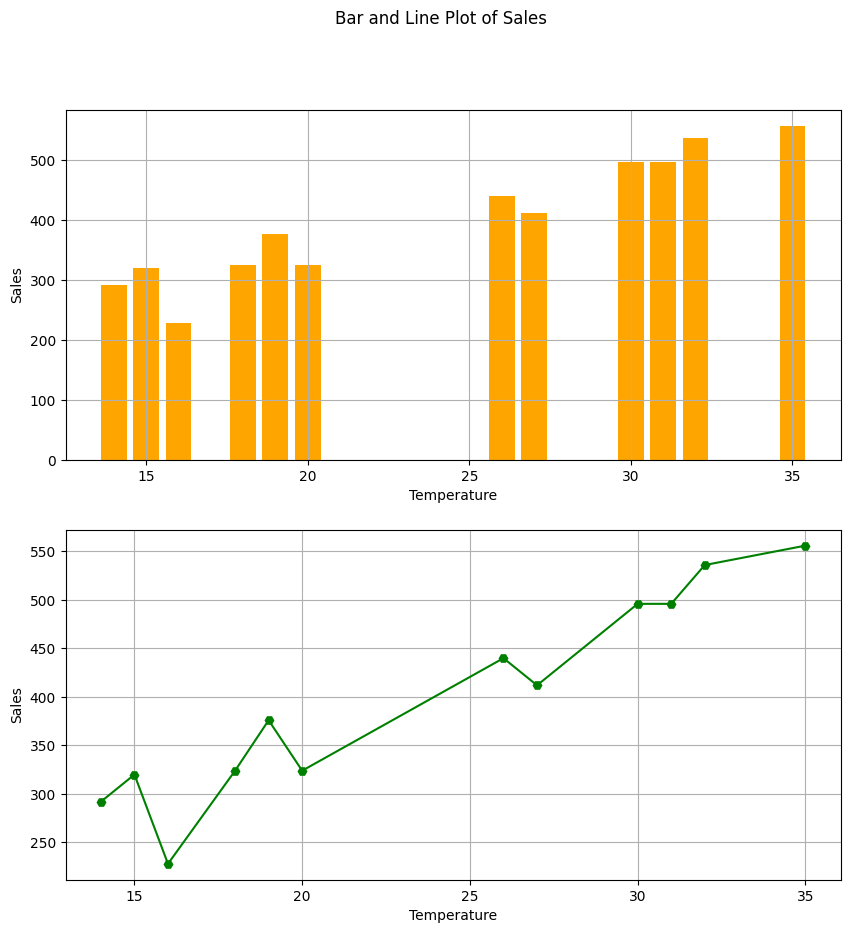

In [35]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.bar(temps, sales, color='orange')
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Sales')


plt.subplot(2, 1, 2)
plt.plot(temps, sales, color='green', marker = 'H')
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.suptitle('Bar and Line Plot of Sales')
plt.show()

**<p style="color:red">EXERCISE 2</p>**

**Create a vertical bar chart to plot the number of Romanian immigrants to Canada between 1980 and 2013.**
* Choose a color for the bars and specify it in hex RGB.
* Set titles for the chart as well as the x and y axis.
* Annotate the chart with an arrow and text indicating "Romanian Revolution".

**Create a horizontal bar chart to plot the number of Romanian immigrants to Canada between 2000 and 2013.**
* Choose a color 'blue' for the bars.
* Annotate each bar with the number of immigrants for that year.


C:\Users\astal\AppData\Local\Temp\ipykernel_16584\2127516945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro_immigrants.drop(['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)


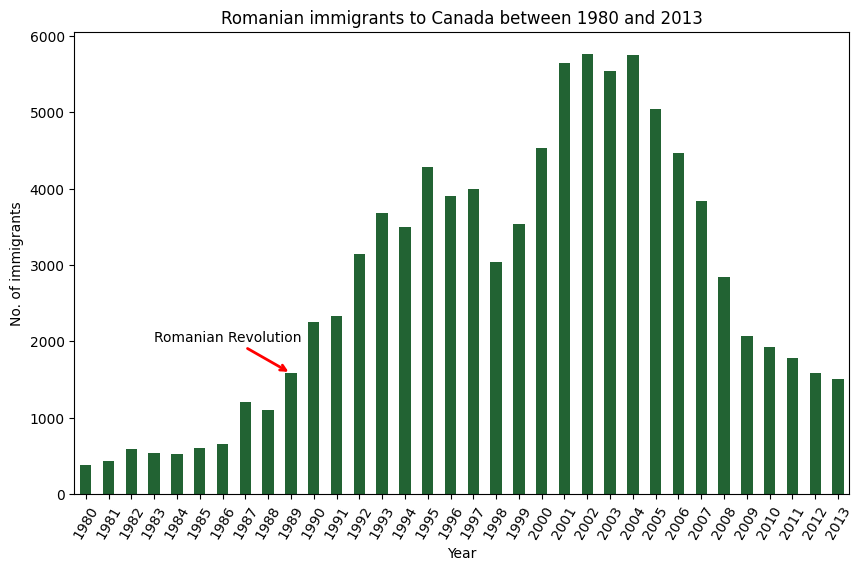

In [36]:
df_immigrants = pd.read_excel('Canada.xlsx',sheet_name=1, skiprows=range(20))
df_ro_immigrants = df_immigrants.loc[df_immigrants['OdName'] == 'Romania']
df_ro_immigrants.drop(['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)

df_ro_immigrants.set_index('OdName', inplace=True)
df_ro_immigrants = df_ro_immigrants.transpose()

df_ro_immigrants.plot(kind='bar', figsize=(10, 6), color='#226333', rot=60, legend=False)
plt.xlabel('Year')
plt.ylabel('No. of immigrants')
plt.title('Romanian immigrants to Canada between 1980 and 2013')

plt.annotate('Romanian Revolution',
             xy=(9, 1582),
             xytext=(3, 2000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.show()

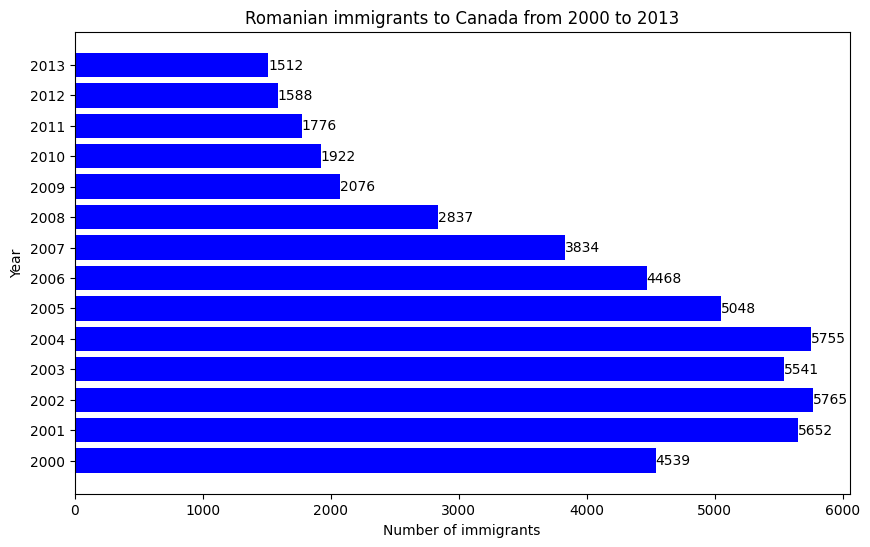

In [37]:
years = list(range(2000, 2014))
df_ro_immigrants2 = df_immigrants.loc[df_immigrants['OdName'] == 'Romania']
df_ro_immigrants2 = df_ro_immigrants2[years].transpose()
df_ro_immigrants2.rename(columns={142: 'Immigrants'}, inplace=True)

# print(df_ro_immigrants2)

plt.figure(figsize=(10,6))
bars = plt.barh(df_ro_immigrants2.index.astype(str), df_ro_immigrants2['Immigrants'], color='blue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', 
             va='center')
plt.xlabel('Number of immigrants')
plt.ylabel('Year')
plt.title('Romanian immigrants to Canada from 2000 to 2013')
plt.show()



**<p style="color:red">EXERCISE 3</p>**
1. **Using the scripting layer**, create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

2. **Using the artist layer**, create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.


C:\Users\astal\AppData\Local\Temp\ipykernel_16584\4290732246.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_5.drop(columns=['totalImmigration'], inplace=True)


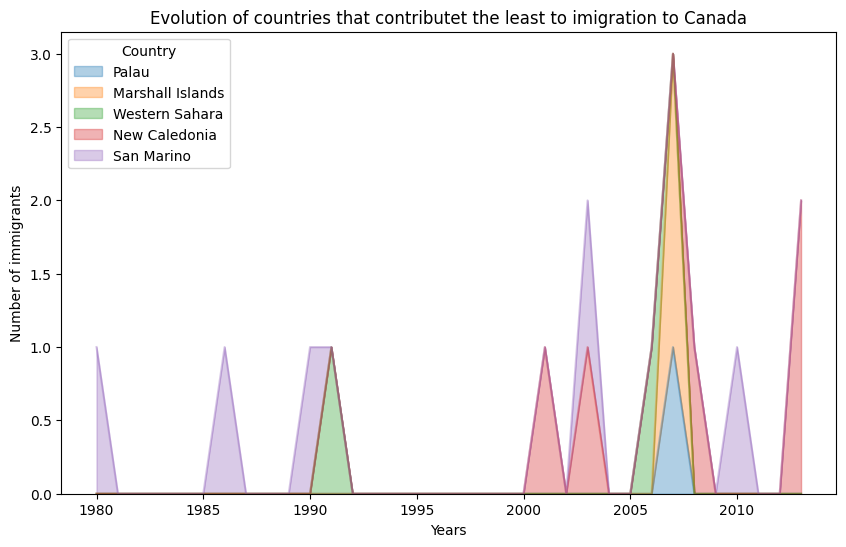

In [38]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=range(20))
df.drop(['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)
years = list(range(1980, 2014))

df['totalImmigration'] = df[years].sum(axis=1)
df.rename(columns={'OdName': 'Country'}, inplace=True)
df.sort_values(by=['totalImmigration'], inplace=True)


least_5 = df.head(5)
least_5.drop(columns=['totalImmigration'], inplace=True)
least_5.set_index('Country', inplace=True)
least_5 = least_5.transpose()
least_5.plot(kind='area', alpha=0.35, figsize=(10,6), stacked=True)
plt.title('Evolution of countries that contributet the least to imigration to Canada')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()


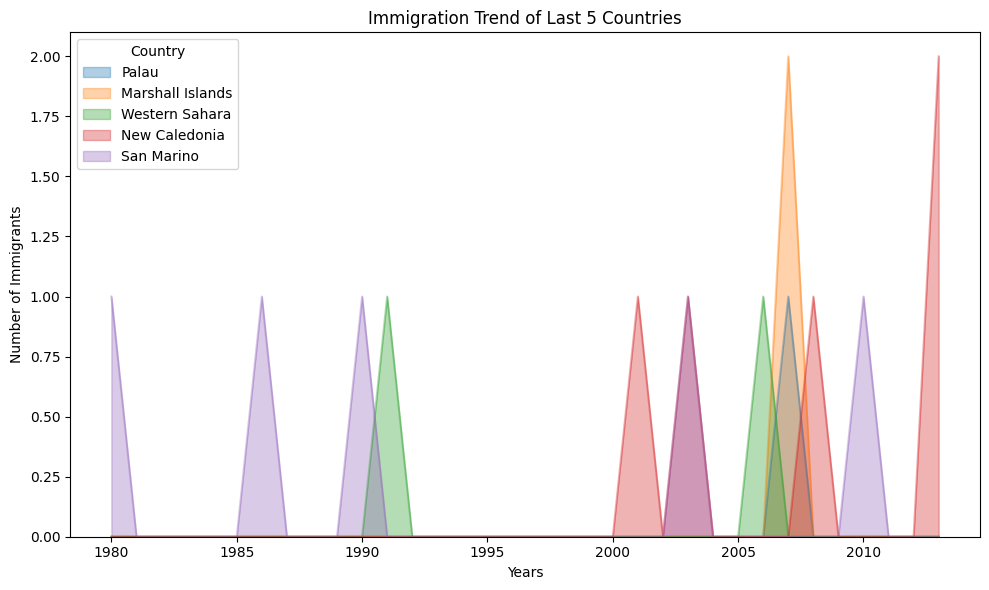

In [39]:
ax = least_5.plot(kind='area', alpha=0.35, figsize=(10, 6), stacked=False)
ax.set_title('Immigration Trend of Last 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.tight_layout()
plt.show()

**<p style="color:red">EXERCISE 4</p>**

Create a histogram to display the immigration distribution for Greece, Poland, Romania, and Bulgaria for years 1980 - 2013.

* Use an overlapping plot with 15 bins and a transparency value of 0.35.
* Add a legend, title for the chart, x and y axis.
* Make adjustments to your chart so that aesthetics are improved.

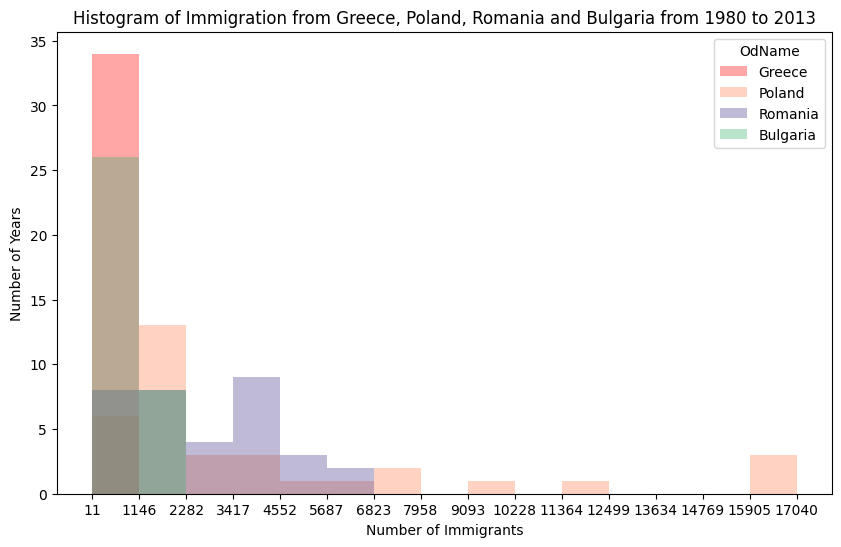

In [40]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=range(20))
df.drop(['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName'], axis=1, inplace=True)
df.set_index('OdName', inplace=True)
years = list(range(1980, 2014))
countries = ['Greece', 'Poland', 'Romania', 'Bulgaria']


df = df.loc[countries].transpose()

count, bin_edges = np.histogram(df, 15)
df.plot(kind='hist', figsize=(10,6), bins = 15, alpha=0.35, xticks=bin_edges,
        color=['red', 'coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Greece, Poland, Romania and Bulgaria from 1980 to 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()